Importation des modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import tree
import m2cgen as m2c

Chargement des datas et des features depuis l'excel

In [2]:
df = pd.read_excel (r'patient_data.xlsx', sheet_name='Sheet6')
raw_datas = df.values.tolist()
print("forme de chaque data : ",raw_datas[0])

features_list = list(df.to_dict().keys())[:-3] #avec -3 on exclue les résultats
features_res_list = list(df.to_dict().keys())[-3:] 
print("features : ", features_list)
print("features du resultat : ", features_res_list)

def analyseRes(y_predic):
    y_new = []
    for i in range(len(y_predict)):
        if (y_predict[i]>=0.5):
            y_new.append(1)
        else :
            y_new.append(0)
    return y_new



forme de chaque data :  ['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N']
features :  ['Fasting Blood Sugar>1,26g/L (2 different times)', 'associated symptoms (thirsty/poliuria)', 'weightloss', 'Blood sugar >2g/L', 'tired', 'blurred vision']
features du resultat :  ['It is recommended to have a fasting blood sugar level control urgently ', ' It is highly recommended to have a medical advise in max 10 days', 'It is recommended to have an A1c blood test']


Mise en forme des listes X (données entrantes patients) et y (résultats en sortie)

In [3]:
X=[]
y=[]
y_element1= []
y_element2= []
y_element3= []
for j in range(len(raw_datas)):
    X_element = []
   
    for i in range(len(raw_datas[0])):
        
        if (i<=len(raw_datas[0])-4):
            ##on est dans les features
            if (raw_datas[j][i]=='Y') :
            
                X_element.append(1)
            else :
                X_element.append(0)
        elif (i==len(raw_datas[0])-3) :
            if (raw_datas[j][i]=='Y') :
            
                y_element1.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element1.append(0)
        elif (i==len(raw_datas[0])-2) :
            if (raw_datas[j][i]=='Y') :

                y_element2.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element2.append(0)
        elif (i==len(raw_datas[0])-1) :
            if (raw_datas[j][i]=='Y') :

                y_element3.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element3.append(0)
    
    X.append(X_element)  

y.append(y_element1)
y.append(y_element2)
y.append(y_element3)
#print(X[0], X[1],y[0],y[1])     
print(y)
print(len(X))

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1

Test de prediction sur du binaire pour la première colonne de résultat

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

def ecart(y_test, y_pred):
    cnt = 0
    for i in range(len(y_test)):
        if y_test[i]!=y_pred[i] :
            cnt +=1
    return cnt/len(y_test)

print("y prédit : " , y_pred ,", diff : ", ecart(y_test,y_pred))

#test de prediction sur un X quelconque
y_predict = clf.predict([[0, 0, 0, 0, 0, 0]])
#print(y_predict)

y prédit :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1] , diff :  0.0


Test de prédiction sur la 1ère colonne avec MLP (non binaire)

y prédit :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1] , diff :  0.04
function score(input) {
    return ((((((-2.243025274145117) + ((input[0]) * (-2.1579231525670735))) + ((input[1]) * (2.565373064267963))) + ((input[2]) * (0.7881891310279248))) + ((input[3]) * (1.2598088769272828))) + ((input[4]) * (0.05091127023054371))) + ((input[5]) * (-1.4815667901918235));
}



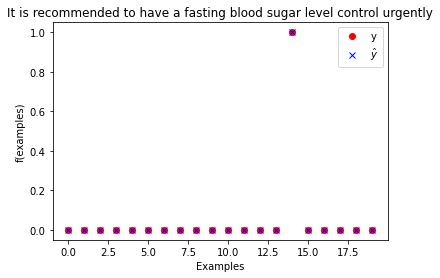

In [5]:
# Marche pas très bien pour des résultats binaires

X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)
mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')

plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a fasting blood sugar level control urgently")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

Test de prédiction sur la 2ème colonne avec MLP

y prédit :  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1] , diff :  0.0
y test :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1] ,y pred :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1] [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1]
function score(input) {
    return ((((((-1.9918921358721473) + ((input[0]) * (2.8419046587086836))) + ((input[1]) * (1.5731723233802648))) + ((input[2]) * (0.7065055102334576))) + ((input[3]) * (1.4594811627777624))) + ((input[4]) * (0.2914503494533588))) + ((input[5]) * (-1.6017957935641505));
}



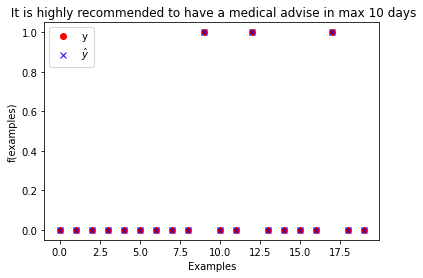

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y[1],random_state=1, test_size = 0.20)
mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title (" It is highly recommended to have a medical advise in max 10 days")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

y prédit :  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1] , diff :  0.0
y test :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1] ,y pred :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1] [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1]
function score(input) {
    return ((((((-1.5930076977272303) + ((input[0]) * (3.4299627694870325))) + ((input[1]) * (1.3806726041804105))) + ((input[2]) * (0.6165462833579349))) + ((input[3]) * (1.3177291416524413))) + ((input[4]) * (-0.24085144480620613))) + ((input[5]) * (-1.0872168895206806));
}



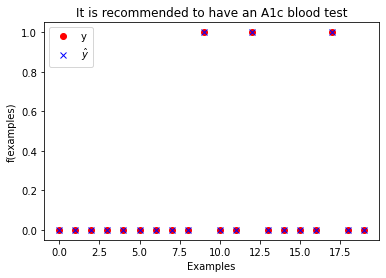

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y[2],random_state=1, test_size = 0.20)
mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have an A1c blood test")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

In [8]:
##test d'une prédiction sur un nouveau X
y_predict = mlp.predict([[0, 0, 1, 0, 1, 1]])
print(analyseRes(y_predict))

[0]


In [15]:
df = pd.read_excel (r'patient_data.xlsx', sheet_name='Sheet1')
raw_datas = df.values.tolist()
#print("raw : ",raw_datas[0])

features_list = list(df.to_dict().keys())[:-5] 
features_res_list = list(df.to_dict().keys())[-5:] 
#print("features : \n", features_list)

#print("features res: \n", features_res_list)

feature_tobin = {0:["m","f","n"],3:["white","black","asian","metis","ethnicity"], 2:["fr","african","afro-american","chinese","it"], 5:["plane","hill", "moutain","sea","don't know"],6:["below highschool","high school","professional school", "bachelor","master"],4:[">1million", "<100000", "100000-1million"]}


list_tobin = [0,2,3,4,5,6]

def binarisation(person,list_tobin):
    #feature 2, 3, 4, 5, 6 à binarizer
    person_new = []
    for i in range(len(person)) :
        if i in list_tobin :
            
            
            list_feat = feature_tobin.get(i)
            
            for j in range(len(list_feat)):
              
                if list_feat[j]==person[i] :
                    person_new.append(1)
                else :
                    person_new.append(0)
        else :
            person_new.append(person[i])
    return person_new


#print("Not formated : ",raw_datas)
def format_string (s):
    if (type(s)==str):
        res=s
        if ("1" in res):
            res=res.replace(" ","")
            #print(res)
        return res.lower()
    return s

def list_formated(l):
    res=map(format_string,l)
    #print(list(res))
    return list(res)

def data_formated(d):
    res=[]
    for DTperson in d:
        res.append(list_formated(DTperson))
        
    return res

raw_datas = data_formated(raw_datas)
#print("preprocessed : ",raw_datas[0])
print("raw : ",raw_datas[0])
print("binarized : ",binarisation(raw_datas[0],list_tobin))


raw :  ['m', 56, 'fr', 'white', '>1milion', 'plane', 'professional school', 5, 'n', 'n', 'n', 'n', 'y', 'n']
binarized :  [1, 0, 0, 56, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 'n', 'n', 'n', 'n', 'y', 'n']


In [10]:
X=[]
y=[]
y_element1 = []
y_element2 = []
y_element3 = []
y_element4 = []
y_element5 = []

for j in range(len(raw_datas)):
    raw_datas[j]=binarisation(raw_datas[j],list_tobin)
    
for j in range(len(raw_datas)):
    X_element = []
    
    for i in range(len(raw_datas[0])):
           
        if (i<=len(raw_datas[0])-6):
            ##on est dans les features
            if (raw_datas[j][i]=='y') :
            
                X_element.append(1)
            elif (raw_datas[j][i]=='n') :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                X_element.append(0)
            else :
                  X_element.append(raw_datas[j][i])
       
                
        elif (i==len(raw_datas[0])-1) :
            if (raw_datas[j][i]=='y') :
            
                y_element5.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element5.append(0)
        elif (i==len(raw_datas[0])-2) :
            if (raw_datas[j][i]=='y') :
            
                y_element4.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element4.append(0)
        elif (i==len(raw_datas[0])-3) :
            if (raw_datas[j][i]=='y') :
            
                y_element3.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element3.append(0)
        elif (i==len(raw_datas[0])-4) :
            if (raw_datas[j][i]=='y') :
            
                y_element2.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element2.append(0)
        elif (i==len(raw_datas[0])-5) :
            if (raw_datas[j][i]=='y') :
            
                y_element1.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element1.append(0)
        
    
    X.append(X_element)   

y.append(y_element1)  
y.append(y_element2)
y.append(y_element3)
y.append(y_element4)
y.append(y_element5)
print(len(X))

print(y)

121
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 

y prédit :  [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0] , diff :  0.08
y test :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] ,y pred :  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
function score(input) {
    return (((((((((((((((((((((((((((((15.837729468637262) + ((input[0]) * (-0.9983810861442863))) + ((input[1]) * (0.9983589007918215))) + ((input[2]) * (0.0))) + ((input[3]) * (-0.7266660515945634))) + ((input[4]) * (0.5006032585561098))) + ((input[5]) * (-0.6843677874617478))) + ((input[6]) * (-0.00003689119008751017))) + ((input[7]) * (0.12558398630212075))) + ((input[8]) * (-0.0015705380358727638))) + ((input[9]) * (-0.018261970289841143))) + ((input[10]) * (-0.10729133336225474))) + ((input[11]) * (0.0))) + ((input[12]) * (0.0))) + ((input[13]) * (0.0))) + ((input[14]) * (-0.13267163653304417))) + ((input[15]) * (-0.5563588045350782))) + ((input[16]) * (0.0

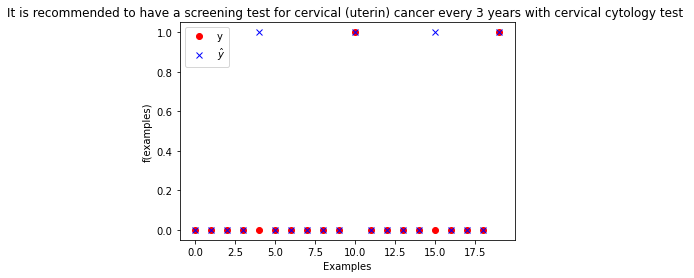

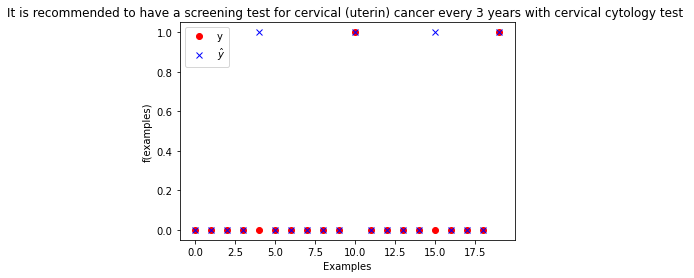

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)

mlp = LogisticRegression(max_iter = 1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening test for cervical (uterin) cancer every 3 years with cervical cytology test ")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

y prédit :  [0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0] , diff :  0.04
y prédit :  [0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0] , diff :  0.04
y test :  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0] ,y pred :  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0] [0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0]
function score(input) {
    return (((((((((((((((((((((((((((((-7.107707395473616) + ((input[0]) * (-2.580288171621335))) + ((input[1]) * (2.5805278404960186))) + ((input[2]) * (0.0))) + ((input[3]) * (0.15811240624816825))) + ((input[4]) * (-0.7168160963316643))) + ((input[5]) * (0.7580318165405838))) + ((input[6]) * (-0.05806304499773181))) + ((input[7]) * (-0.3452611775995336))) + ((input[8]) * (0.5930782925824167))) + ((input[9]) * (0.4361057901463338))) + ((input[10]) * (-0.07241646909546812))) + ((input[11]) * (0.0))) + ((input[12]) * (0.0))) + ((input[13]) * (0.0))) + ((input[14]) * (0.2812358860941618

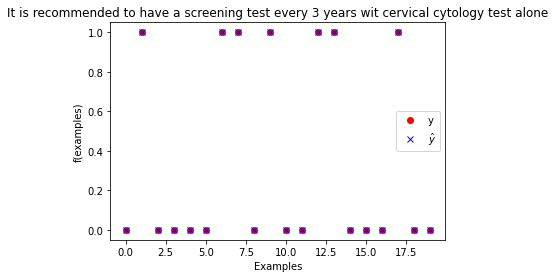

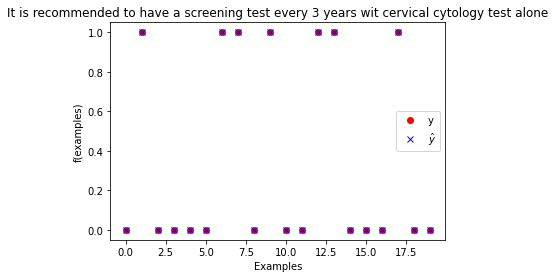

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y[1],random_state=1, test_size = 0.20)

mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening test every 3 years wit cervical cytology test alone")


model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

y prédit :  [0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0] , diff :  0.04
y test :  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0] ,y pred :  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0] [0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0]
function score(input) {
    return (((((((((((((((((((((((((((((-7.107707395473616) + ((input[0]) * (-2.580288171621335))) + ((input[1]) * (2.5805278404960186))) + ((input[2]) * (0.0))) + ((input[3]) * (0.15811240624816825))) + ((input[4]) * (-0.7168160963316643))) + ((input[5]) * (0.7580318165405838))) + ((input[6]) * (-0.05806304499773181))) + ((input[7]) * (-0.3452611775995336))) + ((input[8]) * (0.5930782925824167))) + ((input[9]) * (0.4361057901463338))) + ((input[10]) * (-0.07241646909546812))) + ((input[11]) * (0.0))) + ((input[12]) * (0.0))) + ((input[13]) * (0.0))) + ((input[14]) * (0.2812358860941618))) + ((input[15]) * (0.6698627562583446))) + ((input[16]) * (0.0))) + ((input[

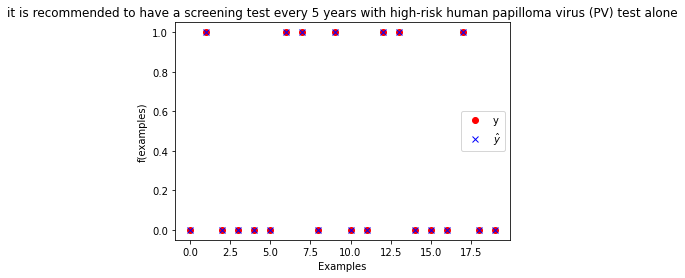

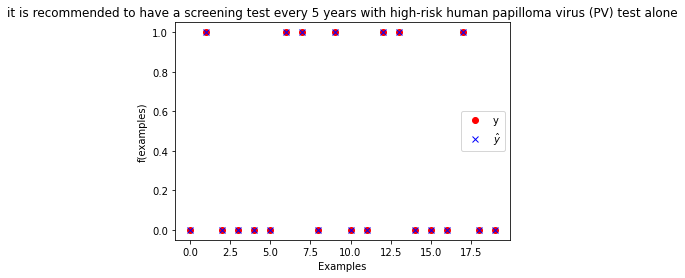

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y[2],random_state=1, test_size = 0.20)

mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("it is recommended to have a screening test every 5 years with high-risk human papilloma virus (PV) test alone")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

y prédit :  [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0] , diff :  0.0
y prédit :  [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0] , diff :  0.0
y test :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0] ,y pred :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0] [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0]
function score(input) {
    return (((((((((((((((((((((((((((((-65.016278062999) + ((input[0]) * (0.2319679842081265))) + ((input[1]) * (-0.23178740640068066))) + ((input[2]) * (0.0))) + ((input[3]) * (1.3465749814998))) + ((input[4]) * (0.010436996271309715))) + ((input[5]) * (0.008662052365322916))) + ((input[6]) * (0.000003764800427927406))) + ((input[7]) * (-0.01416521369339964))) + ((input[8]) * (0.000038119784643356635))) + ((input[9]) * (0.010487856738691074))) + ((input[10]) * (0.00864466168389695))) + ((input[11]) * (0.0))) + ((input[12]) * (0.0))) + ((input[13]) * (0.0))) + ((input[14]) * (-0.06946136

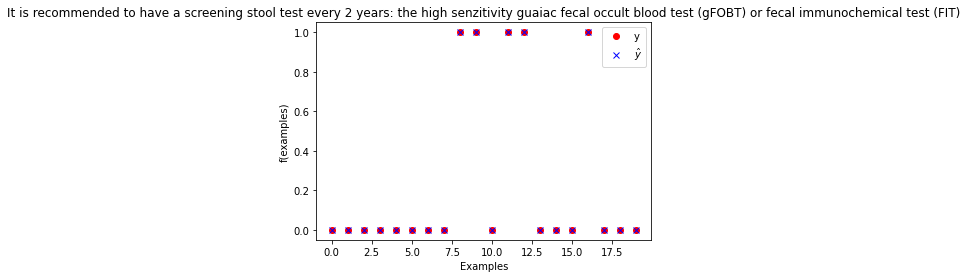

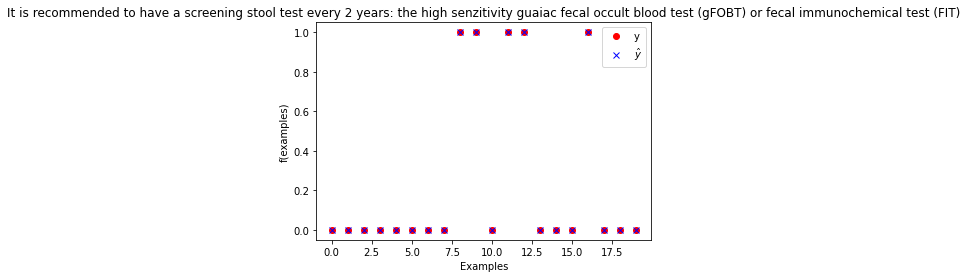

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y[3],random_state=1, test_size = 0.20)

mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening stool test every 2 years: the high senzitivity guaiac fecal occult blood test (gFOBT) or fecal immunochemical test (FIT)")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)

y prédit :  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] , diff :  0.04
y test :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] ,y pred :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
function score(input) {
    return (((((((((((((((((((((((((((((-10.615789309779618) + ((input[0]) * (-0.8654561780746072))) + ((input[1]) * (0.8653241043402232))) + ((input[2]) * (0.0))) + ((input[3]) * (0.19568709289495761))) + ((input[4]) * (0.26266896324134653))) + ((input[5]) * (-0.22287394208815656))) + ((input[6]) * (-0.004168600787424852))) + ((input[7]) * (-0.002319809685018623))) + ((input[8]) * (-0.0048483265214293745))) + ((input[9]) * (0.2712663895830797))) + ((input[10]) * (-0.2683730723411358))) + ((input[11]) * (0.0))) + ((input[12]) * (0.0))) + ((input[13]) * (0.0))) + ((input[14]) * (-0.43566385460051643))) + ((input[15]) * (-0.3081376633095639))) + ((input[16]) * (0.0)

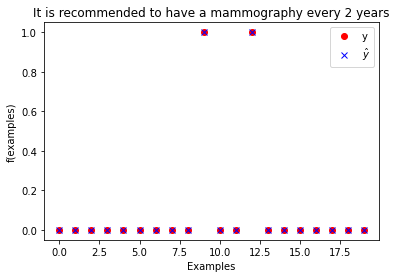

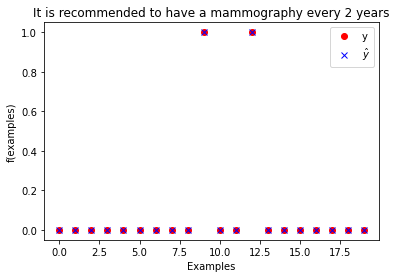

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y[4],random_state=1, test_size = 0.20)

mlp = LogisticRegression(max_iter=1000)
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print("y prédit : " , y_predict ,", diff : ", ecart(y_test,y_predict))

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a mammography every 2 years")

model_to_javascript = m2c.export_to_javascript(mlp)
print(model_to_javascript)